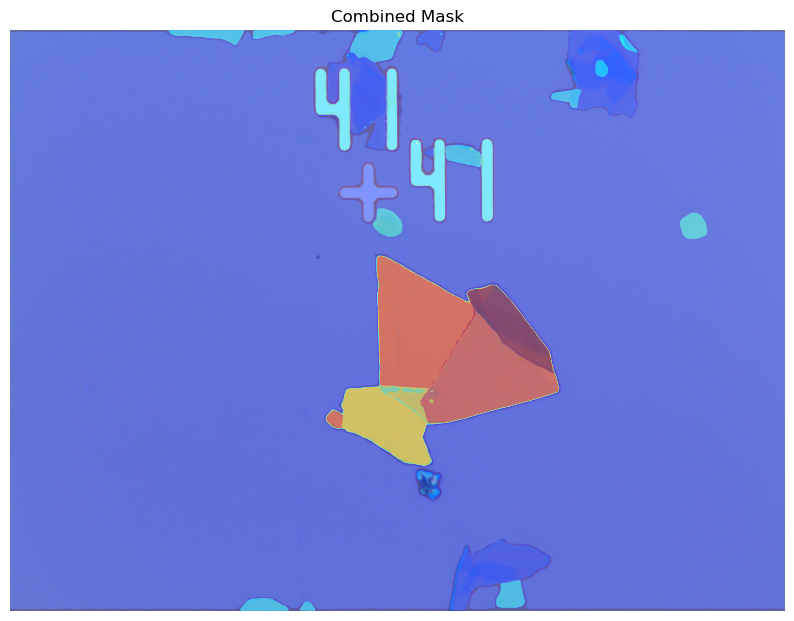

In [ ]:
import torch
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 모델 로드
sam_checkpoint = "sam_vit_h_4b8939.pth"  
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device="cuda" if torch.cuda.is_available() else "cpu")

# SAM 예측기 생성
predictor = SamPredictor(sam)

# 이미지 로드
image = cv2.imread("path_to_your_image.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 예측기 설정
predictor.set_image(image_rgb)

# 포인트를 기반으로 세그멘테이션 수행
input_point = np.array([[300, 500]])
input_label = np.array([1])
masks, scores, _ = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=False)

# 결과 시각화
combined_mask = np.zeros_like(masks[0]["segmentation"], dtype=np.float32)
for mask in masks:
    combined_mask += mask["segmentation"].astype(np.float32)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # 원본 이미지
plt.imshow(combined_mask, alpha=0.5, cmap='jet')  # 모든 마스크를 합친 이미지
plt.title("Combined Mask")
plt.axis('off')
plt.show()